<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction

Linear algebra is an important concept in data science and machine learning.

# 1.2 Elements of Linear Algebra

1.2.1 Linear Spaces

Linear combination - a new vector constructed from a subset by multiplying each vector by a constant and adding the results.

Linear subspace - a result of linear combination. That is, for all $u_1, u_2\in U$ and $\alpha \in \mathbb{R}$, it holds that $u_1+u_2\in U$ and $\alpha u_1 \in U$.

In [1]:
#The code shows an example of linear combination
import numpy as np
from numpy import arccos, dot
v = np.array([5,6,2])
w = np.array([7,-1,7])
u = np.array([0,2,0])
x = 2*v-1*w+3*u
print(x)

[ 3 19 -3]


Span - a span of a set of vectors is a linear subspace.

Lemma 1 - Let W = span($w_1, w_2$), then W is a linear subspace.

Column space - Let $A\in \mathbb{R}^{n*m}$ be a n*m matrix with columns $a_1,...,a_m\in \mathbb{R}^n$. The column space of A, denoted col(A), is the span of the columns of A, col(A) = $span(a_1,...,a_m)\in \mathbb{R}$

Linear independence - a list of vectors $u_1,...,u_m$ is linearly independent if none of them can be written as a linear combination if the others, that is $\forall i, u_1\notin span({u_j:j\neq i})$.

Lemma 2 - The vectors $u_1,...,u_m$ are linearly independent if and only if $\sum^m_{j=0} a_j u_j = 0 \rightarrow a_j = 0, \forall j$.

Basis - a set of vectors that generates all elements of the vector space and the vectors in the set are linearly independent. Let U be a linear subspace of V. A basis of U is a list of vectors $u_1,...,u_m$ in U that: (1) span U, that is, U = span(u_1,...,u_m); and (2) are linearly independent. Denote by $e_1,...,e_n$ the standard basis of $\mathbb{R}^n$

Dimension Theorem - Let U be a linear subspace of V. Any basis of U always has the same number of elements. All bases of U have the same length, that is, the same number of elements. We call this number the dimension of U and denote it dim(U).

Lemma 3 - Let $u_1,...,u_m$ be a linearly dependent list of vectors with linearly independent subset, $u_1,1\in \{1,...,k\}, k < m $. Then there is an $i > k$ such that:

1. $u_i \in span(u_1,...,u_{i-1})$

2. $span(\{u_j : j\in\{1,...,m\}\}) = span (\{u_j : j\in\{1,...,m\}, j\neq i \})$

1.2.2 Orthogonality

Norm - $\left\lVert u\right\rVert = \sqrt{\sum^n_iu_i^2}$

Inner product - $\langle u,v\rangle = u*v=\sum^n_iu_iv_i$

A list of vectors ${u_1,...,u_m}$ is orthonormal if the u_i's are pairwise orthogonal and each has norm 1, that is for all i and all j$\neq$i, $\left\lVert u_i\right\rVert = 1$ and $\langle u_i,u_j\rangle = 0$

Orthonormal Basis Expansion Theorem - Let $q_1,...,q_m$ be an orthonormal basis of U and u $\in$ U. Then u = $\sum_{j=1}^m\langle u,q_j\rangle q_j$

Best Approximation Theorem - Let U $\subseteq$ V be a linear subspace with orthonormal basis $q_1,...,q_m$ and let $v\in V$. For any $u\in U$ $\left\lVert v-𝒫_Uv \right\rVert \leq \left\lVert v-u\right\rVert$.

1.2.3 Gram-Schmidt Process

The Gram-Schmidt algorithm is used to obtain an orthonormal basis.

Gram-Schmidt Theorem - Let $a_1,...,a_m$ in $R^n$ be linearly independent. THen there exist an orthonormal basis $q_1,...,q_m$ of span($a_1,...,a_m$).

1.2.4 Eigenvalues and Eigenvectors

Let A $\in ℝ^{d*d}$ be a square matrix. Then $λ\in ℝ$ is an eigencalue of A if there exists a nonzero vector $x\neq 0$ such that $Ax = \lambda x$. The vector x is referred to as an eigenvector.

In [2]:
#The code shows how to calculate eigenvalues and eigenvectors using python
import numpy as np
from numpy.linalg import eig
x = np.array([ [7, -1], [3, 2] ])
w,v = eig(x)
print('E-value:', w)
print('E-vector', v)

E-value: [6.30277564 2.69722436]
E-vector [[0.82030016 0.22637487]
 [0.57193326 0.97404026]]


In general, $A \in ℝ^{d*d}$ has at most d distinct eigenvalues.

Theorem - If A is symmetric,then any two eigenvectors from different
eigenspaces are orthogonal.

# 1.3 Linear Regression

1.3.1 QR Decomposition

QR decomposition is a useful procedure to solve the linear least squares
problem. It breaks down a matrix A in to two parts Q and R such that R is upper-triangular. A=QR.

In [3]:
#The code shows an example of QR decompositiong with python
import numpy as np
from numpy.linalg import qr
x = np.array([[3, 2], [7, 5]])

Q,R = qr(x)
print('Q:', Q)
print('R:', R)

#Now check if the dot product QR brought back the origional matrix A
A = np.dot(Q, R)
print('QR:', A)

Q: [[-0.3939193  -0.91914503]
 [-0.91914503  0.3939193 ]]
R: [[-7.61577311 -5.38356375]
 [ 0.          0.13130643]]
QR: [[3. 2.]
 [7. 5.]]


1.3.2 Least-squares Problems

Let $A\in ℝ^{n*m}$ be an n*m matrix and $b \in ℝ^n$ be a vector. When n>m, we can not just simply use the matrix inverse, then we can cast is as the least-squares problem. $min_{x\inℝ^m}\left\lVert Ax-b\right\rVert$.

The least square regression formula is:
$\beta = (A^TA)^{-1}A^TY$.

In [4]:
#The least-square regression with y = 1 + x + x * np.random.random(len(x))
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.53188603]
 [0.98528427]]


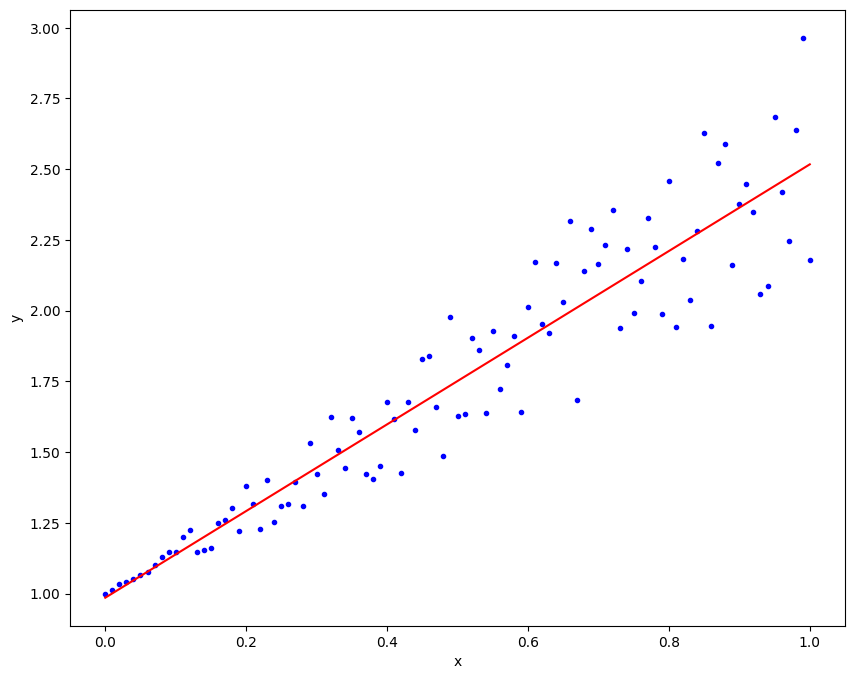

In [5]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()